# 실전분석
- 켈리포니아 집값 분석

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/luxdolorosa/data_set/master/google/california_housing_train.csv'
df = pd.read_csv(url)

In [7]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             16999 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null int64
total_rooms           17000 non-null int64
total_bedrooms        17000 non-null int64
population            17000 non-null int64
households            17000 non-null int64
median_income         17000 non-null float64
median_house_value    17000 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [10]:
# 비어있는(결측치) 데이터 확인하기
df.isnull().sum()

longitude             1
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [23]:
# 실습하기
# 결측치(비어있는) 데이터 조회
df.loc[df.longitude.isnull(),'longitude'] = -118.41

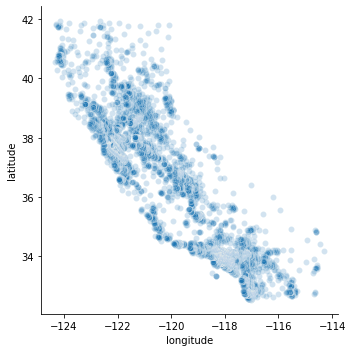

In [27]:
# 실습하기
# df에서 산포도를 이용하여 데이터가 어떻게 분포되어 있는지 보기
# x=longitude
# y=latitude
sns.relplot(x='longitude', y='latitude', data=df, alpha=0.2)
pass

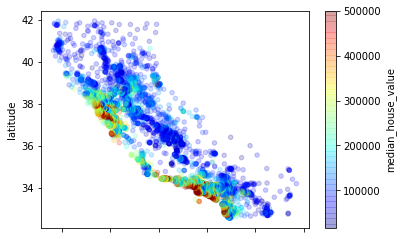

In [30]:
# plot의 옵션들
df.plot(kind='scatter'
        , x='longitude'
        , y='latitude'
        , alpha=0.2
        , c='median_house_value' # color
        , cmap=plt.get_cmap('jet')
       )
pass

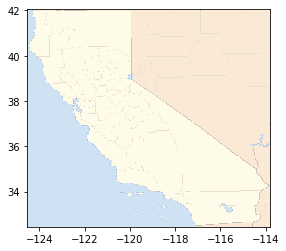

In [39]:
# 시각화 plot의 배경화면입히기
img_url = 'https://github.com/luxdolorosa/data_set/blob/master/google/california.png?raw=true'
california_img = mpimg.imread(img_url)
plt.imshow(california_img, extent=[-124.55,-113.80,32.45,42.05], alpha=0.5)
pass

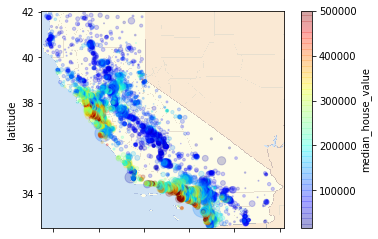

In [41]:
df.plot(kind='scatter'
        , x='longitude'
        , y='latitude'
        , alpha=0.2
        , c='median_house_value' # color
        , cmap=plt.get_cmap('jet')
        , s=df.population / 100 # size
       )
plt.imshow(california_img, extent=[-124.55,-113.80,32.45,42.05], alpha=0.5)
plt.show()
pass

In [42]:
# 데이터의 연관도(상관관계) 계산하기
# 표준상관계수 : 피어슨 상관계수
# -1~1 사이의 값을 가지고
# 0에 가까울수록 아무런 연관이 없다.
# 1에 가까울수록 양의 상관관계
# -1에 가까울수록 음의 상관관계

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null int64
total_rooms           17000 non-null int64
total_bedrooms        17000 non-null int64
population            17000 non-null int64
households            17000 non-null int64
median_income         17000 non-null float64
median_house_value    17000 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [49]:
corr_matrix = df.corr()

In [50]:
# 집값에 대한 상관관계보기
corr_matrix['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

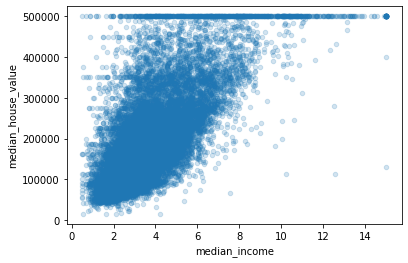

In [63]:
# 상관관계가 높았던 소득으로 산포도 그리기
df.plot.scatter(x='median_income', y='median_house_value', alpha=0.2)
pass

In [65]:
# 방 개수 / 가정 수
df['room_per_household'] = df.loc[:,'total_rooms'] / df.loc[:,'households']

In [67]:
# 침실 수 / 전체 방
df['bedroom_per_room'] = df.loc[:,'total_bedrooms'] / df.loc[:,'total_rooms']

In [69]:
# 인구 수  / 가정 수 
df['population_per_households'] = df.loc[:,'population'] / df.loc[:,'households']

In [74]:
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedroom_per_room,population_per_households
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,11.889831,0.228617,2.150424
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,16.522678,0.248497,2.438445
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,6.153846,0.241667,2.846154
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,6.641593,0.224517,2.278761
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,5.549618,0.224209,2.381679
5,-114.58,33.63,29,1387,236,671,239,3.3438,74000,5.803347,0.170151,2.807531
6,-114.58,33.61,25,2907,680,1841,633,2.6768,82400,4.592417,0.233918,2.908373
7,-114.59,34.83,41,812,168,375,158,1.7083,48500,5.139241,0.206897,2.373418
8,-114.59,33.61,34,4789,1175,3134,1056,2.1782,58400,4.535038,0.245354,2.967803
9,-114.60,34.83,46,1497,309,787,271,2.1908,48100,5.523985,0.206413,2.904059


In [78]:
# 추가된 특성을 포함하여 상관도 다시 구하기
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.691871
room_per_household           0.150081
total_rooms                  0.130991
housing_median_age           0.106758
households                   0.061031
total_bedrooms               0.045783
population                  -0.027850
population_per_households   -0.042764
longitude                   -0.044982
latitude                    -0.144917
bedroom_per_room            -0.258190
Name: median_house_value, dtype: float64